In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [32]:
df = pd.read_csv("data.csv")
df = df.drop(['CustomerID'],axis=1)
df_summary = df.describe() 
print(df_summary)

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


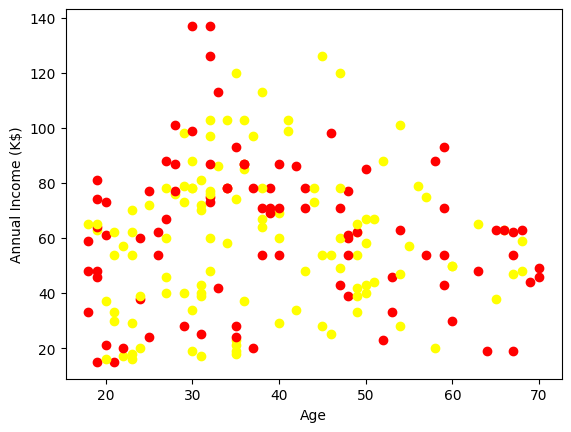

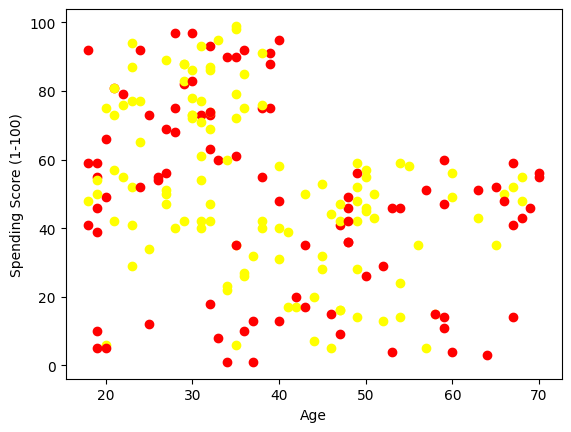

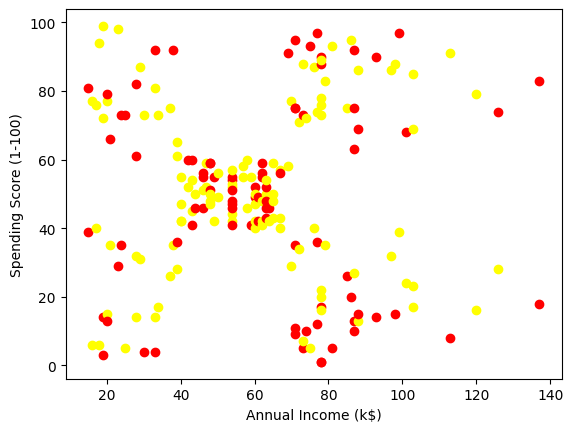

In [33]:
plt.xlabel('Age')
plt.ylabel('Annual Income (K$)')
for i in range(len(df['Age'])):
    plt.scatter(x=df['Age'][i],y=df['Annual Income (k$)'][i],color = 'red' if (df['Gender'][i] == 'Male') else 'yellow')
    
plt.show()


plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
for i in range(len(df['Age'])):
    plt.scatter(x=df['Age'][i],y=df['Spending Score (1-100)'][i],color = 'red' if (df['Gender'][i] == 'Male') else 'yellow')
    
plt.show()


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
for i in range(len(df['Annual Income (k$)'])):
    plt.scatter(x=df['Annual Income (k$)'][i],y=df['Spending Score (1-100)'][i],color = 'red' if (df['Gender'][i] == 'Male') else 'yellow')
    
plt.show()

In [34]:
df['Gender'] = df['Gender'].map(lambda x: 0 if x=='Male' else 1)

In [35]:
data_np = df.to_numpy()

In [36]:

k_means_centroids = [
    [random.randint(0,1),random.randint(0,60),random.randint(0,100),random.randint(0,100)]
    ,[random.randint(0,1),random.randint(0,60),random.randint(0,100),random.randint(0,100)]
    ,[random.randint(0,1),random.randint(0,60),random.randint(0,100),random.randint(0,100)]
    ,[random.randint(0,1),random.randint(0,60),random.randint(0,100),random.randint(0,100)]]

k_means_centroids

[[0, 32, 1, 12], [0, 50, 34, 31], [1, 47, 35, 33], [0, 43, 75, 98]]

In [37]:
k_means_classes = [[],[],[],[]]


In [38]:
import math
def distance_4d(a,b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2 + (a[2] - b[2]) ** 2 + (a[3] - b[3]) ** 2)

def update_classes(data,k_means_centroids):
    k_means_classes = [[],[],[],[]]
    for point in data:
        nearest_centroid= k_means_centroids[0]
        for centroid in k_means_centroids:
            if distance_4d(point,centroid) < distance_4d(point,nearest_centroid):
                nearest_centroid = centroid
        k_means_classes[k_means_centroids.index(nearest_centroid)].append(point)
    return k_means_classes
        

In [39]:
def update_centeroids(k_means_classes):
         return [
         [sum(k_means_classes[0]) /len(k_means_classes[0][0])],
         [sum(k_means_classes[1]) /len(k_means_classes[1][0])],
         [sum(k_means_classes[2]) /len(k_means_classes[2][0])],
         [sum(k_means_classes[3]) /len(k_means_classes[3][0])],
         ]

In [ ]:
k_means_classes = update_classes(data_np,k_means_centroids)
k_means_centroids = update_centeroids(k_means_classes)

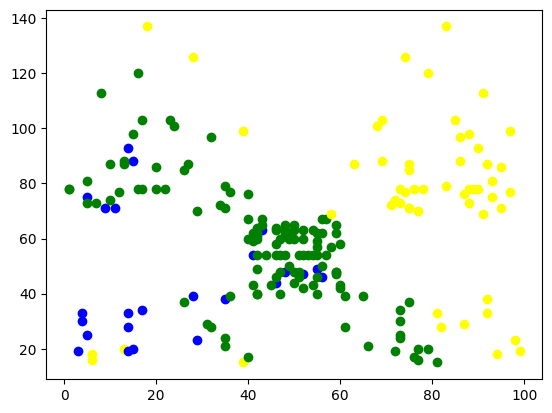

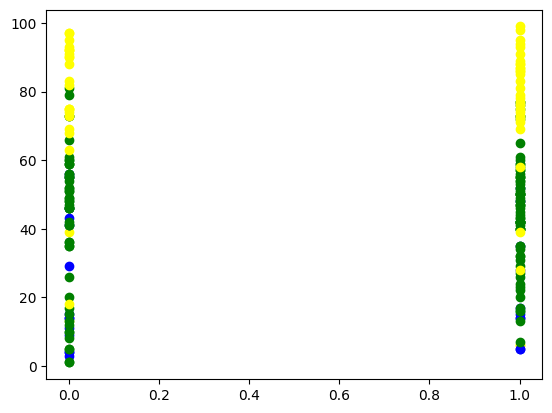

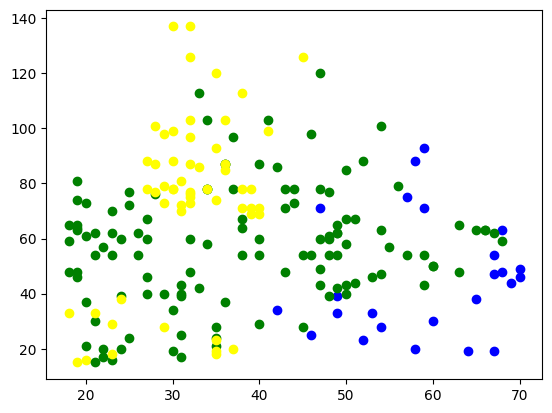

In [51]:

for i in range(len(k_means_classes)):
    for point in k_means_classes[i]:
          color = 'red'
          if i == 1:
              color = 'blue'
          elif i == 2:
              color = 'green'
          else:
              color = 'yellow'
          plt.scatter(x=point[3],y=point[2],color =color)
          
plt.show()


for i in range(len(k_means_classes)):
    for point in k_means_classes[i]:
          color = 'red'
          if i == 1:
              color = 'blue'
          elif i == 2:
              color = 'green'
          else:
              color = 'yellow'
          plt.scatter(x=point[0],y=point[3],color =color)
          
plt.show()

for i in range(len(k_means_classes)):
    for point in k_means_classes[i]:
          color = 'red'
          if i == 1:
              color = 'blue'
          elif i == 2:
              color = 'green'
          else:
              color = 'yellow'
          plt.scatter(x=point[1],y=point[2],color =color)
          
plt.show()